In [1]:
import pandas as pd
import numpy as np

In [2]:
price_dataframe = pd.read_csv("price_data.csv")
price_dataframe = price_dataframe[::-1].reset_index(drop=True)
price_dataframe

,date,state_id,state_name,district_id,district_name,market_name,market_id,commodity_name,modal_price,min_price,max_price
0,2021-01-01,24,Gujarat,478,Porbandar,Porbandar,1698,Wheat,1400.0,1350.0,1450.0
1,2021-01-01,24,Gujarat,478,Porbandar,Porbandar,1698,Wheat,1555.0,1500.0,1610.0
2,2021-01-01,24,Gujarat,477,Jamnagar,Kalawad,1147,Wheat,1600.0,1500.0,1835.0
3,2021-01-01,24,Gujarat,477,Jamnagar,Jamnagar,459,Wheat,1625.0,1500.0,1750.0
4,2021-01-01,24,Gujarat,477,Jamnagar,Dhrol,2683,Wheat,1545.0,1450.0,1640.0
...,...,...,...,...,...,...,...,...,...,...,...
70683,2024-12-31,24,Gujarat,485,Dohad,Zalod(Sanjeli),3003,Wheat,2750.0,2400.0,2750.0
70684,2024-12-31,24,Gujarat,485,Dohad,Limkheda,1348,Wheat,2500.0,2400.0,2600.0
70685,2024-12-31,24,Gujarat,485,Dohad,Dahod,59,Wheat,3250.0,3170.0,3280.0
70686,2024-12-31,24,Gujarat,485,Dohad,Dahod,59,Wheat,3200.0,3140.0,3250.0


In [3]:
price_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70688 entries, 0 to 70687
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            70688 non-null  object 
 1   state_id        70688 non-null  int64  
 2   state_name      70688 non-null  object 
 3   district_id     70688 non-null  int64  
 4   district_name   70688 non-null  object 
 5   market_name     70688 non-null  object 
 6   market_id       70688 non-null  int64  
 7   commodity_name  70688 non-null  object 
 8   modal_price     70688 non-null  float64
 9   min_price       70678 non-null  float64
 10  max_price       70632 non-null  float64
dtypes: float64(3), int64(3), object(5)
memory usage: 5.9+ MB


In [4]:
price_dataframe['min_price'] = price_dataframe['min_price'].interpolate(method="linear")
price_dataframe['max_price'] = price_dataframe['max_price'].interpolate(method='linear')
price_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70688 entries, 0 to 70687
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            70688 non-null  object 
 1   state_id        70688 non-null  int64  
 2   state_name      70688 non-null  object 
 3   district_id     70688 non-null  int64  
 4   district_name   70688 non-null  object 
 5   market_name     70688 non-null  object 
 6   market_id       70688 non-null  int64  
 7   commodity_name  70688 non-null  object 
 8   modal_price     70688 non-null  float64
 9   min_price       70688 non-null  float64
 10  max_price       70688 non-null  float64
dtypes: float64(3), int64(3), object(5)
memory usage: 5.9+ MB


In [5]:
Arrival_quantity = pd.read_csv("quantity_data.csv")
arrival_quantity = Arrival_quantity[['date', 'market_name', 'total_quantity']]

In [6]:
final_dataframe = pd.merge(price_dataframe, arrival_quantity, on=['date', 'market_name'], how='inner')
final_dataframe

,date,state_id,state_name,district_id,district_name,market_name,market_id,commodity_name,modal_price,min_price,max_price,total_quantity
0,2021-01-01,24,Gujarat,478,Porbandar,Porbandar,1698,Wheat,1400.0,1350.0,1450.0,7.00
1,2021-01-01,24,Gujarat,478,Porbandar,Porbandar,1698,Wheat,1555.0,1500.0,1610.0,7.00
2,2021-01-01,24,Gujarat,477,Jamnagar,Kalawad,1147,Wheat,1600.0,1500.0,1835.0,40.20
3,2021-01-01,24,Gujarat,477,Jamnagar,Jamnagar,459,Wheat,1625.0,1500.0,1750.0,552.00
4,2021-01-01,24,Gujarat,477,Jamnagar,Dhrol,2683,Wheat,1545.0,1450.0,1640.0,5.60
...,...,...,...,...,...,...,...,...,...,...,...,...
75134,2024-12-31,24,Gujarat,485,Dohad,Zalod(Sanjeli),3003,Wheat,2750.0,2400.0,2750.0,0.20
75135,2024-12-31,24,Gujarat,485,Dohad,Limkheda,1348,Wheat,2500.0,2400.0,2600.0,0.03
75136,2024-12-31,24,Gujarat,485,Dohad,Dahod,59,Wheat,3250.0,3170.0,3280.0,75.10
75137,2024-12-31,24,Gujarat,485,Dohad,Dahod,59,Wheat,3200.0,3140.0,3250.0,75.10


In [7]:
final_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75139 entries, 0 to 75138
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            75139 non-null  object 
 1   state_id        75139 non-null  int64  
 2   state_name      75139 non-null  object 
 3   district_id     75139 non-null  int64  
 4   district_name   75139 non-null  object 
 5   market_name     75139 non-null  object 
 6   market_id       75139 non-null  int64  
 7   commodity_name  75139 non-null  object 
 8   modal_price     75139 non-null  float64
 9   min_price       75139 non-null  float64
 10  max_price       75139 non-null  float64
 11  total_quantity  75139 non-null  float64
dtypes: float64(4), int64(3), object(5)
memory usage: 6.9+ MB


In [8]:
districts = list(final_dataframe['district_name'].drop_duplicates())
district_ids = list(final_dataframe['district_id'].drop_duplicates())
print(f"District list:\n{districts}\n")
print(f"District id list:\n{district_ids}\n")

markets = list(final_dataframe['market_name'].drop_duplicates())
market_id = list(final_dataframe['market_id'].drop_duplicates())
print(f"Market list:\n{markets}\n")
print(f"Market id list:\n{market_id}")

District list:
['Porbandar', 'Jamnagar', 'Gandhinagar', 'Rajkot', 'Sabar Kantha', 'Banas Kantha', 'Patan', 'Bhavnagar', 'Anand', 'Junagadh', 'Amreli', 'Dohad', 'Panch Mahals', 'Kheda', 'Mahesana', 'Bharuch', 'Surendranagar', 'Surat', 'Ahmedabad', 'Kachchh', 'Vadodara']

District id list:
[478, 477, 473, 476, 472, 469, 470, 481, 482, 479, 480, 485, 484, 483, 471, 488, 475, 492, 474, 468, 486]

Market list:
['Porbandar', 'Kalawad', 'Jamnagar', 'Dhrol', 'Bhanvad', 'Dehgam(Rekhiyal)', 'Dehgam', 'Rajkot', 'Gondal', 'Dhoraji', 'Himatnagar', 'Dhansura', 'Bhiloda', 'Vadgam', 'Thara(Shihori)', 'Thara', 'Deesa(Bhildi)', 'Siddhpur', 'Patan', 'Botad', 'Bhavnagar', 'Umreth', 'Mangrol', 'Savarkundla', 'Rajula', 'Amreli', 'Dahod', 'Godhra(Timbaroad)', 'Godhra(Kakanpur)', 'Morva Hafad', 'Kapadvanj', 'Khambhat(Grain Market)', 'Borsad', 'Bagasara', 'Dhanera', 'Visnagar', 'Vijapur(Kukarvada)', 'Vijapur(Gojjariya)', 'Mehsana(Jornang)', 'Becharaji', 'Kalol', 'Vijapur', 'Tharad', 'Panthawada', 'Palanpur', '

In [ ]:
weather_dataframe = pd.read_csv('weatherdata.csv')
weather_dataframe.info()

In [10]:
weather_dataframe = weather_dataframe[['datetime', 'tempmax', 'tempmin', 'temp', 'dew', 'humidity', 'precipprob', 'windspeed']]
weather_dataframe['datetime'] = pd.to_datetime(weather_dataframe['datetime'], format='%d-%m-%Y')
weather_dataframe.rename(columns={'datetime' : 'date'}, inplace=True)
weather_dataframe

,date,tempmax,tempmin,temp,dew,humidity,precipprob,windspeed
0,2021-01-01,27.1,15.0,20.5,9.9,51.3,0,11.2
1,2021-01-02,27.3,16.0,21.1,8.5,46.0,0,9.4
2,2021-01-03,26.1,11.0,18.4,5.4,46.6,0,13.0
3,2021-01-04,28.0,13.0,19.7,9.3,54.9,0,7.6
4,2021-01-05,25.3,14.0,19.1,10.2,58.0,0,11.2
...,...,...,...,...,...,...,...,...
1456,2024-12-27,78.9,66.2,70.8,62.0,74.6,0,8.1
1457,2024-12-28,76.9,60.8,68.1,57.7,70.0,0,38.7
1458,2024-12-29,77.0,59.0,67.6,51.9,57.8,0,16.1
1459,2024-12-30,78.8,57.2,66.4,52.1,60.6,0,10.3


In [11]:
final_dataframe['date'] = pd.to_datetime(final_dataframe['date'])
weather_dataframe['date'] = pd.to_datetime(weather_dataframe['date'])
combined_dataframe = pd.merge(final_dataframe, weather_dataframe, on='date', how='left')
combined_dataframe

,date,state_id,state_name,district_id,district_name,market_name,market_id,commodity_name,modal_price,min_price,max_price,total_quantity,tempmax,tempmin,temp,dew,humidity,precipprob,windspeed
0,2021-01-01,24,Gujarat,478,Porbandar,Porbandar,1698,Wheat,1400.0,1350.0,1450.0,7.00,27.1,15.0,20.5,9.9,51.3,0,11.2
1,2021-01-01,24,Gujarat,478,Porbandar,Porbandar,1698,Wheat,1555.0,1500.0,1610.0,7.00,27.1,15.0,20.5,9.9,51.3,0,11.2
2,2021-01-01,24,Gujarat,477,Jamnagar,Kalawad,1147,Wheat,1600.0,1500.0,1835.0,40.20,27.1,15.0,20.5,9.9,51.3,0,11.2
3,2021-01-01,24,Gujarat,477,Jamnagar,Jamnagar,459,Wheat,1625.0,1500.0,1750.0,552.00,27.1,15.0,20.5,9.9,51.3,0,11.2
4,2021-01-01,24,Gujarat,477,Jamnagar,Dhrol,2683,Wheat,1545.0,1450.0,1640.0,5.60,27.1,15.0,20.5,9.9,51.3,0,11.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75134,2024-12-31,24,Gujarat,485,Dohad,Zalod(Sanjeli),3003,Wheat,2750.0,2400.0,2750.0,0.20,79.2,57.2,68.4,54.8,62.9,0,10.3
75135,2024-12-31,24,Gujarat,485,Dohad,Limkheda,1348,Wheat,2500.0,2400.0,2600.0,0.03,79.2,57.2,68.4,54.8,62.9,0,10.3
75136,2024-12-31,24,Gujarat,485,Dohad,Dahod,59,Wheat,3250.0,3170.0,3280.0,75.10,79.2,57.2,68.4,54.8,62.9,0,10.3
75137,2024-12-31,24,Gujarat,485,Dohad,Dahod,59,Wheat,3200.0,3140.0,3250.0,75.10,79.2,57.2,68.4,54.8,62.9,0,10.3


In [12]:
from sklearn.preprocessing import LabelEncoder

le_district = LabelEncoder()
le_market = LabelEncoder()

combined_dataframe['district_labels'] = le_district.fit_transform(combined_dataframe['district_name'])
combined_dataframe['market_labels'] = le_market.fit_transform(combined_dataframe['market_name'])
combined_dataframe = combined_dataframe[['date', 'district_labels', 'market_labels', 
                                         'modal_price', 'min_price', 'max_price', 
                                         'total_quantity', 'tempmax', 'tempmin', 'temp', 
                                         'dew', 'humidity', 'precipprob', 'windspeed' 
                                         ]]
combined_dataframe

,date,district_labels,market_labels,modal_price,min_price,max_price,total_quantity,tempmax,tempmin,temp,dew,humidity,precipprob,windspeed
0,2021-01-01,15,85,1400.0,1350.0,1450.0,7.00,27.1,15.0,20.5,9.9,51.3,0,11.2
1,2021-01-01,15,85,1555.0,1500.0,1610.0,7.00,27.1,15.0,20.5,9.9,51.3,0,11.2
2,2021-01-01,8,49,1600.0,1500.0,1835.0,40.20,27.1,15.0,20.5,9.9,51.3,0,11.2
3,2021-01-01,8,43,1625.0,1500.0,1750.0,552.00,27.1,15.0,20.5,9.9,51.3,0,11.2
4,2021-01-01,8,29,1545.0,1450.0,1640.0,5.60,27.1,15.0,20.5,9.9,51.3,0,11.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75134,2024-12-31,6,125,2750.0,2400.0,2750.0,0.20,79.2,57.2,68.4,54.8,62.9,0,10.3
75135,2024-12-31,6,61,2500.0,2400.0,2600.0,0.03,79.2,57.2,68.4,54.8,62.9,0,10.3
75136,2024-12-31,6,18,3250.0,3170.0,3280.0,75.10,79.2,57.2,68.4,54.8,62.9,0,10.3
75137,2024-12-31,6,18,3200.0,3140.0,3250.0,75.10,79.2,57.2,68.4,54.8,62.9,0,10.3


In [13]:
district_label_mapping = dict(zip(le_district.transform(le_district.classes_), le_district.classes_))
print(f"District labels and corresponding names: \n\n{district_label_mapping}\n")
market_label_mapping = dict(zip(le_market.transform(le_market.classes_), le_market.classes_))
print(f"Market labels and corresponding names: \n\n{market_label_mapping}")

District labels and corresponding names: 

{0: 'Ahmedabad', 1: 'Amreli', 2: 'Anand', 3: 'Banas Kantha', 4: 'Bharuch', 5: 'Bhavnagar', 6: 'Dohad', 7: 'Gandhinagar', 8: 'Jamnagar', 9: 'Junagadh', 10: 'Kachchh', 11: 'Kheda', 12: 'Mahesana', 13: 'Panch Mahals', 14: 'Patan', 15: 'Porbandar', 16: 'Rajkot', 17: 'Sabar Kantha', 18: 'Surat', 19: 'Surendranagar', 20: 'Vadodara'}

Market labels and corresponding names: 

{0: 'Amirgadh', 1: 'Amreli', 2: 'Anand', 3: 'Babra', 4: 'Bagasara', 5: 'Bavla', 6: 'Bayad', 7: 'Bayad(Demai)', 8: 'Bayad(Sadamba)', 9: 'Becharaji', 10: 'Bhabhar', 11: 'Bhanvad', 12: 'Bhavnagar', 13: 'Bhesan', 14: 'Bhiloda', 15: 'Borsad', 16: 'Botad', 17: 'Chotila', 18: 'Dahod', 19: 'Dasada Patadi', 20: 'Deesa', 21: 'Deesa(Bhildi)', 22: 'Dehgam', 23: 'Dehgam(Rekhiyal)', 24: 'Dhanera', 25: 'Dhansura', 26: 'Dhari', 27: 'Dhoraji', 28: 'Dhragradhra', 29: 'Dhrol', 30: 'Godhra', 31: 'Godhra(Kakanpur)', 32: 'Godhra(Timbaroad)', 33: 'Gogamba', 34: 'Gondal', 35: 'Halvad', 36: 'Harij', 37: 

In [14]:
month_num_to_name = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

month_column = []

for d in combined_dataframe['date']: # type: ignore
    month_column.append(month_num_to_name[d.month])

len(month_column)

75139

In [15]:
combined_dataframe['month_column'] = month_column

C:\Users\jayesh\AppData\Local\Temp\ipykernel_20028\4037180100.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_dataframe['month_column'] = month_column


In [16]:
def get_season(month):
    if month in ['December', 'January', 'February']:
        return 'Winter'
    elif month in ['March', 'April', 'May']:
        return 'Summer'
    elif month in ['June', 'July', 'August', 'September']:
        return 'Monsoon'
    elif month in ['October', 'November']:
        return 'Post-Monsoon'

# Assuming you already have a 'month' column with integer values
combined_dataframe['season'] = combined_dataframe['month_column'].apply(get_season)

C:\Users\jayesh\AppData\Local\Temp\ipykernel_20028\3570835439.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_dataframe['season'] = combined_dataframe['month_column'].apply(get_season)


In [17]:
day_of_week = []

for day in combined_dataframe['date']:
    
    df = pd.Timestamp(day)
    day = df.dayofweek
    day_of_week.append(day)

len(day_of_week)

75139

In [18]:
combined_dataframe['day'] = day_of_week

C:\Users\jayesh\AppData\Local\Temp\ipykernel_20028\3260189346.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_dataframe['day'] = day_of_week


In [19]:
Final_DataFrame = combined_dataframe.drop(columns=['date'])
Final_DataFrame

,district_labels,market_labels,modal_price,min_price,max_price,total_quantity,tempmax,tempmin,temp,dew,humidity,precipprob,windspeed,month_column,season,day
0,15,85,1400.0,1350.0,1450.0,7.00,27.1,15.0,20.5,9.9,51.3,0,11.2,January,Winter,4
1,15,85,1555.0,1500.0,1610.0,7.00,27.1,15.0,20.5,9.9,51.3,0,11.2,January,Winter,4
2,8,49,1600.0,1500.0,1835.0,40.20,27.1,15.0,20.5,9.9,51.3,0,11.2,January,Winter,4
3,8,43,1625.0,1500.0,1750.0,552.00,27.1,15.0,20.5,9.9,51.3,0,11.2,January,Winter,4
4,8,29,1545.0,1450.0,1640.0,5.60,27.1,15.0,20.5,9.9,51.3,0,11.2,January,Winter,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75134,6,125,2750.0,2400.0,2750.0,0.20,79.2,57.2,68.4,54.8,62.9,0,10.3,December,Winter,1
75135,6,61,2500.0,2400.0,2600.0,0.03,79.2,57.2,68.4,54.8,62.9,0,10.3,December,Winter,1
75136,6,18,3250.0,3170.0,3280.0,75.10,79.2,57.2,68.4,54.8,62.9,0,10.3,December,Winter,1
75137,6,18,3200.0,3140.0,3250.0,75.10,79.2,57.2,68.4,54.8,62.9,0,10.3,December,Winter,1


C:\Users\jayesh\AppData\Local\Temp\ipykernel_20028\2109227738.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


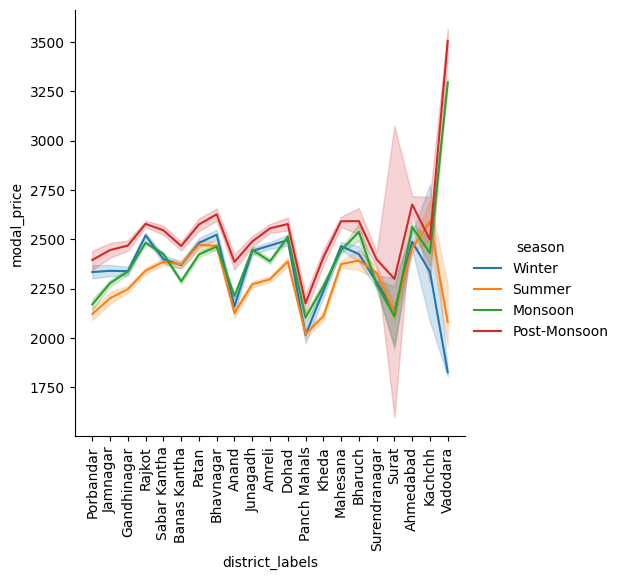

In [21]:
import seaborn as sns

plot = sns.relplot(data=Final_DataFrame, x=Final_DataFrame['district_labels'].map(district_label_mapping), y='modal_price', hue='season', kind='line')
for ax in plot.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

In [22]:
import plotly.express as px

fig = px.bar(Final_DataFrame, x=Final_DataFrame['district_labels'].map(district_label_mapping), y='modal_price', color='season', height=400)
fig.show()

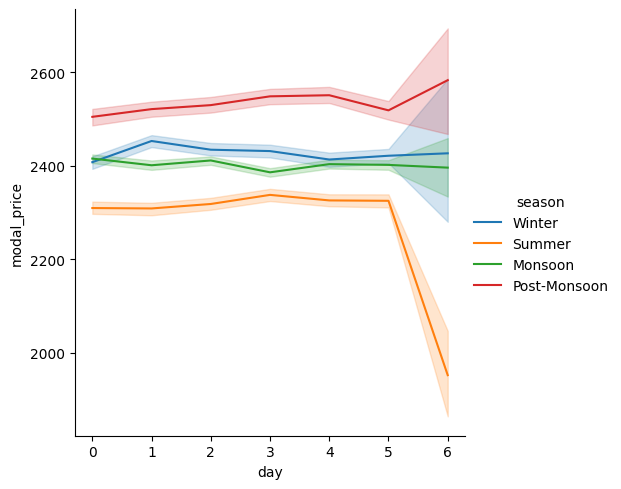

In [23]:
sns.relplot(data=Final_DataFrame, x='day', y='modal_price', hue='season', kind='line')

In [24]:
dist = Final_DataFrame['month_column']
distset = set(dist)
dd = list(distset)
dictofwords = { dd[i] : i for i in range(0, len(dd))}
Final_DataFrame['month_column'] = Final_DataFrame['month_column'].map(dictofwords)

In [25]:
dist = Final_DataFrame['season']
distset = set(dist)
dd = list(distset)
dictofwords = { dd[i] : i for i in range(0, len(dd))}
Final_DataFrame['season'] = Final_DataFrame['season'].map(dictofwords)

In [26]:
Final_DataFrame

,district_labels,market_labels,modal_price,min_price,max_price,total_quantity,tempmax,tempmin,temp,dew,humidity,precipprob,windspeed,month_column,season,day
0,15,85,1400.0,1350.0,1450.0,7.00,27.1,15.0,20.5,9.9,51.3,0,11.2,3,1,4
1,15,85,1555.0,1500.0,1610.0,7.00,27.1,15.0,20.5,9.9,51.3,0,11.2,3,1,4
2,8,49,1600.0,1500.0,1835.0,40.20,27.1,15.0,20.5,9.9,51.3,0,11.2,3,1,4
3,8,43,1625.0,1500.0,1750.0,552.00,27.1,15.0,20.5,9.9,51.3,0,11.2,3,1,4
4,8,29,1545.0,1450.0,1640.0,5.60,27.1,15.0,20.5,9.9,51.3,0,11.2,3,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75134,6,125,2750.0,2400.0,2750.0,0.20,79.2,57.2,68.4,54.8,62.9,0,10.3,9,1,1
75135,6,61,2500.0,2400.0,2600.0,0.03,79.2,57.2,68.4,54.8,62.9,0,10.3,9,1,1
75136,6,18,3250.0,3170.0,3280.0,75.10,79.2,57.2,68.4,54.8,62.9,0,10.3,9,1,1
75137,6,18,3200.0,3140.0,3250.0,75.10,79.2,57.2,68.4,54.8,62.9,0,10.3,9,1,1


In [27]:
Final_DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75139 entries, 0 to 75138
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   district_labels  75139 non-null  int32  
 1   market_labels    75139 non-null  int32  
 2   modal_price      75139 non-null  float64
 3   min_price        75139 non-null  float64
 4   max_price        75139 non-null  float64
 5   total_quantity   75139 non-null  float64
 6   tempmax          75139 non-null  float64
 7   tempmin          75139 non-null  float64
 8   temp             75139 non-null  float64
 9   dew              75139 non-null  float64
 10  humidity         75139 non-null  float64
 11  precipprob       75139 non-null  int64  
 12  windspeed        75139 non-null  float64
 13  month_column     75139 non-null  int64  
 14  season           75139 non-null  int64  
 15  day              75139 non-null  int64  
dtypes: float64(10), int32(2), int64(4)
memory usage: 8.6 MB


In [36]:
selected_features = Final_DataFrame[
    [
        'district_labels',
        'market_labels',
        'modal_price',
        'total_quantity',
        'tempmax',
        'tempmin',
        'temp',
        'dew',
        'humidity',
        'precipprob',
        'windspeed',
        'month_column',
        'season',
        'day'
    ]
]

selected_features

,district_labels,market_labels,modal_price,total_quantity,tempmax,tempmin,temp,dew,humidity,precipprob,windspeed,month_column,season,day
0,15,85,1400.0,7.00,27.1,15.0,20.5,9.9,51.3,0,11.2,3,1,4
1,15,85,1555.0,7.00,27.1,15.0,20.5,9.9,51.3,0,11.2,3,1,4
2,8,49,1600.0,40.20,27.1,15.0,20.5,9.9,51.3,0,11.2,3,1,4
3,8,43,1625.0,552.00,27.1,15.0,20.5,9.9,51.3,0,11.2,3,1,4
4,8,29,1545.0,5.60,27.1,15.0,20.5,9.9,51.3,0,11.2,3,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75134,6,125,2750.0,0.20,79.2,57.2,68.4,54.8,62.9,0,10.3,9,1,1
75135,6,61,2500.0,0.03,79.2,57.2,68.4,54.8,62.9,0,10.3,9,1,1
75136,6,18,3250.0,75.10,79.2,57.2,68.4,54.8,62.9,0,10.3,9,1,1
75137,6,18,3200.0,75.10,79.2,57.2,68.4,54.8,62.9,0,10.3,9,1,1


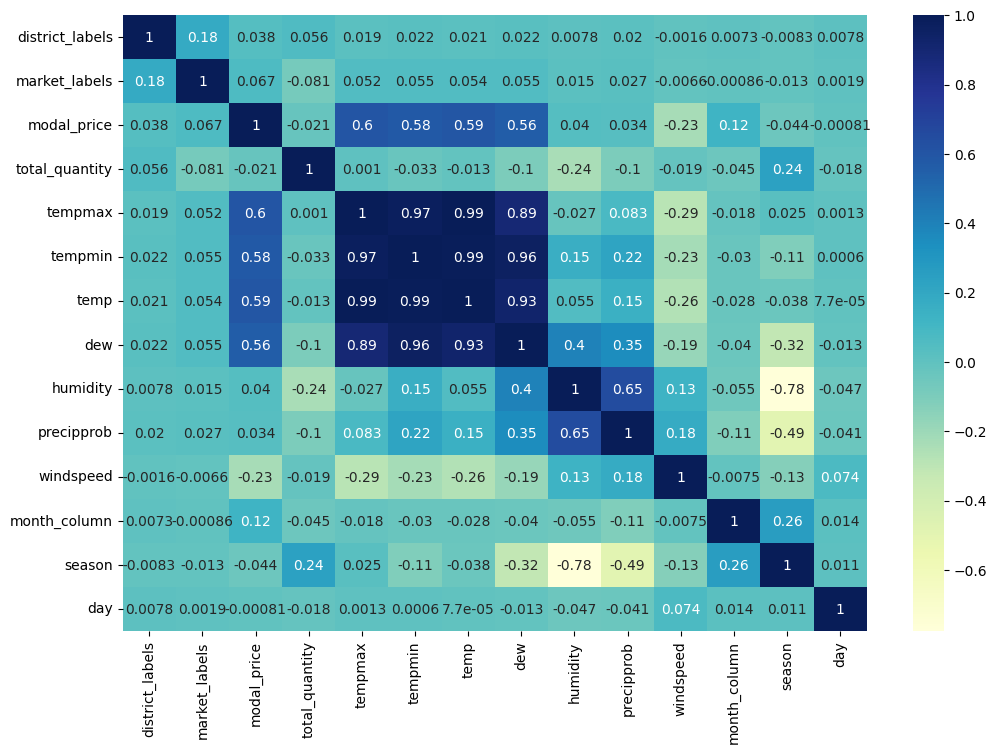

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
dataplot = sns.heatmap(selected_features.corr(), cmap='YlGnBu', annot=True)
plt.show()

In [40]:
X_data = selected_features[
    [
        'district_labels',
        'market_labels',
        'total_quantity',
        'temp',
        'dew',
        'humidity',
        'precipprob',
        'windspeed',
        'month_column',
        'season',
        'day'
    ]
]

Y_data = selected_features['modal_price'] # type: ignore

In [51]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X_data, Y_data, test_size=0.25, random_state=2)

Xtrain
Xtest

,district_labels,market_labels,total_quantity,temp,dew,humidity,precipprob,windspeed,month_column,season,day
74796,1,26,0.34,67.6,56.0,67.2,0,9.2,9,1,2
26518,16,45,7.40,26.0,17.2,60.0,0,9.4,9,1,4
53310,17,120,2.50,94.0,64.3,39.5,0,11.4,10,3,3
40739,16,34,120.70,70.9,59.1,68.4,0,5.8,9,1,1
31990,6,18,158.30,92.1,72.3,55.0,0,17.2,10,3,1
...,...,...,...,...,...,...,...,...,...,...,...
33102,8,29,25.40,92.5,72.8,54.9,0,13.9,6,0,3
38264,5,82,3.64,84.0,71.4,67.4,0,10.3,7,2,0
56561,17,75,9.00,85.4,77.8,78.5,100,11.4,4,0,5
45322,12,74,0.80,70.8,50.2,50.3,0,8.1,3,1,0


In [52]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

regressor = RandomForestRegressor(max_depth=1000, random_state=0)
regressor.fit(Xtrain, Ytrain)

RandomForestRegressor(max_depth=1000, random_state=0)

In [53]:
from sklearn.metrics import r2_score

y_pred = regressor.predict(Xtest)

print(f"r2_score: {r2_score(Ytest, y_pred=y_pred)}")

r2_score: 0.8723251565285022


In [54]:
custom_dataset = pd.read_csv('custom_forcast_dataset.csv')
custom_dataset

,district_labels,market_labels,total_quantity,temp,dew,humidity,precipprob,windspeed,month_column,season,day
0,7,50,17,34.0,13.7,36.5,3.2,23.4,4,2,4
1,7,50,16,33.8,14.3,37.4,16.1,25.9,4,2,5
2,7,50,17,33.4,16.7,42.8,16.1,28.8,4,2,6
3,7,50,15,33.6,16.2,41.6,9.7,32.8,4,2,0
4,7,50,15,33.3,14.0,40.2,9.7,24.1,4,2,1
5,7,50,14,33.8,14.1,40.1,9.7,27.7,4,2,2
6,7,50,17,34.1,17.7,42.4,0.0,18.7,4,2,3
7,7,50,20,34.1,17.6,41.7,0.0,18.4,4,2,4
8,7,50,15,34.1,17.6,42.4,4.8,19.4,4,2,5
9,7,50,16,33.8,17.7,43.1,0.0,19.1,4,2,6


In [56]:
price_forcast = regressor.predict(custom_dataset)
custom_dataset['Predicted_Price'] = price_forcast
custom_dataset

,district_labels,market_labels,total_quantity,temp,dew,humidity,precipprob,windspeed,month_column,season,day,Predicted_Price
0,7,50,17,34.0,13.7,36.5,3.2,23.4,4,2,4,1806.683000
1,7,50,16,33.8,14.3,37.4,16.1,25.9,4,2,5,1821.926333
2,7,50,17,33.4,16.7,42.8,16.1,28.8,4,2,6,1755.403333
3,7,50,15,33.6,16.2,41.6,9.7,32.8,4,2,0,1789.275000
4,7,50,15,33.3,14.0,40.2,9.7,24.1,4,2,1,1717.563333
5,7,50,14,33.8,14.1,40.1,9.7,27.7,4,2,2,1825.038333
6,7,50,17,34.1,17.7,42.4,0.0,18.7,4,2,3,2071.310000
7,7,50,20,34.1,17.6,41.7,0.0,18.4,4,2,4,2071.440000
8,7,50,15,34.1,17.6,42.4,4.8,19.4,4,2,5,2076.620000
9,7,50,16,33.8,17.7,43.1,0.0,19.1,4,2,6,1780.121667
